# Pokemon Data Analysis Project

## Introduction

Welcome to this Jupyter notebook presenting a comprehensive analysis of a Pokemon dataset! In this project, we delve into the intriguing world of Pokemon using data analysis techniques. The dataset at hand contains various attributes for a diverse set of Pokemon, ranging from their types, abilities, and stats to their legendary status.

**Objective:**
The primary goal of this analysis is to explore and understand the characteristics of Pokemon, uncover patterns, and even attempt to predict whether a Pokemon is legendary or not using machine learning.

**Dataset:**
The dataset includes the following columns:
- Name
- Type 1
- Type 2
- HP (Health Points)
- Attack
- Defense
- Sp. Atk (Special Attack)
- Sp. Def (Special Defense)
- Speed
- Generation
- Legendary (Binary variable indicating whether the Pokemon is legendary or not)

**Project Structure:**
1. **Data Loading and Exploration:**
   - Load the dataset and perform an initial exploration to understand its structure and contents.

2. **Data Cleaning:**
   - Address any missing values or inconsistencies in the dataset to ensure reliable analysis.

3. **Exploratory Data Analysis (EDA):**
   - Conduct a thorough analysis of Pokemon types, distributions of various stats, and explore relationships among attributes.

4. **Correlation Analysis:**
   - Examine the correlation between different stats to identify potential patterns and dependencies.

5. **Machine Learning: Predicting Legendary Status:**
   - Utilize a decision tree classifier to predict whether a Pokemon is legendary based on its stats and other attributes.

6. **Visualizing Results:**
   - Visualize the performance of the machine learning model using a confusion matrix and bar plots.

This notebook aims to provide a step-by-step guide through the entire data analysis process. Let's embark on this Pokemon adventure and explore the fascinating world of pocket monsters!


## Loading Libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Loading Dataset

In [3]:
df=pd.read_csv("pokemon_data.csv")

In [4]:
df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [5]:
df.shape

(800, 12)

## Exploratory Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [7]:
df.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [8]:
df.describe(include='object')

,Name,Type 1,Type 2
count,800,800,414
unique,800,18,18
top,Bulbasaur,Water,Flying
freq,1,112,97


In [9]:
df.shape

(800, 12)

In [10]:
df["Type 1"].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [11]:
df["Type 1"].unique().shape

(18,)

In [12]:
df["Type 2"].unique()

array(['Poison', nan, 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

In [13]:
df["Type 2"].unique().shape

(19,)

In [14]:
df["Generation"].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [15]:
list1=["Type 1", "Type 2", "Generation"]
for i in list1:
    print(i, df[i].unique(), df[i].unique().shape)

Type 1 ['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying'] (18,)
Type 2 ['Poison' nan 'Flying' 'Dragon' 'Ground' 'Fairy' 'Grass' 'Fighting'
 'Psychic' 'Steel' 'Ice' 'Rock' 'Dark' 'Water' 'Electric' 'Fire' 'Ghost'
 'Bug' 'Normal'] (19,)
Generation [1 2 3 4 5 6] (6,)


## Data Cleaning

In [17]:
df['Type 2'].fillna('None', inplace=True)

## Data Correlation

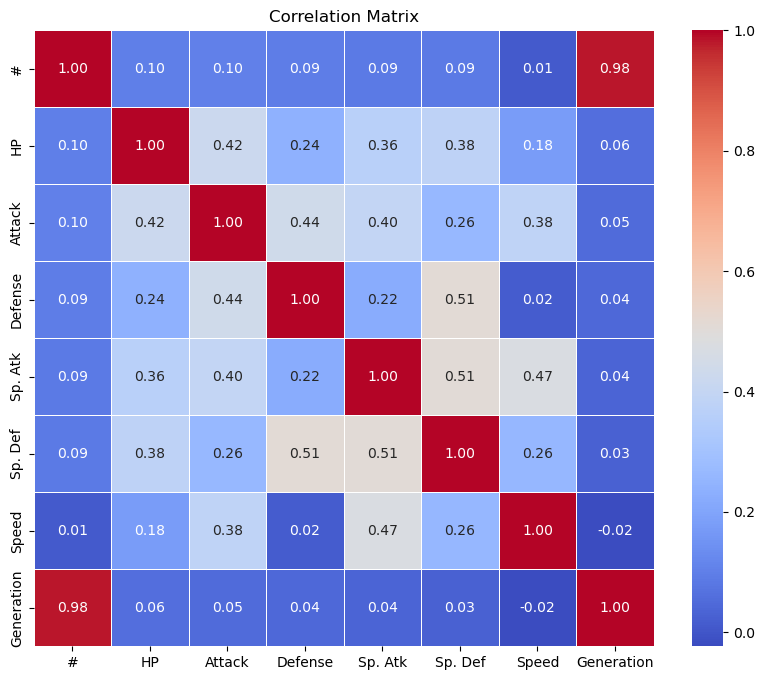

In [22]:
# Correlation matrix for numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numeric_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

## Data Visualization

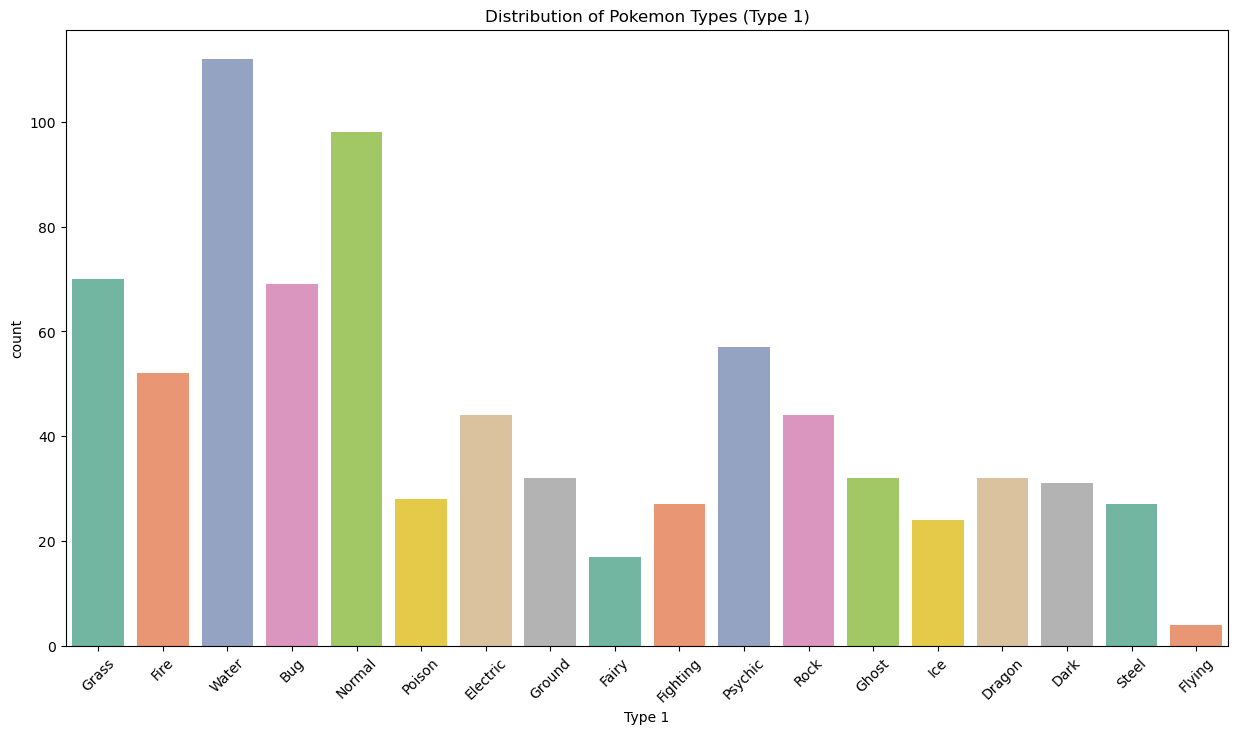

In [23]:
# Visualize the distribution of Pokemon types
plt.figure(figsize=(15, 8))
sns.countplot(x='Type 1', data=df, palette='Set2')
plt.title("Distribution of Pokemon Types (Type 1)")
plt.xticks(rotation=45)
plt.show()

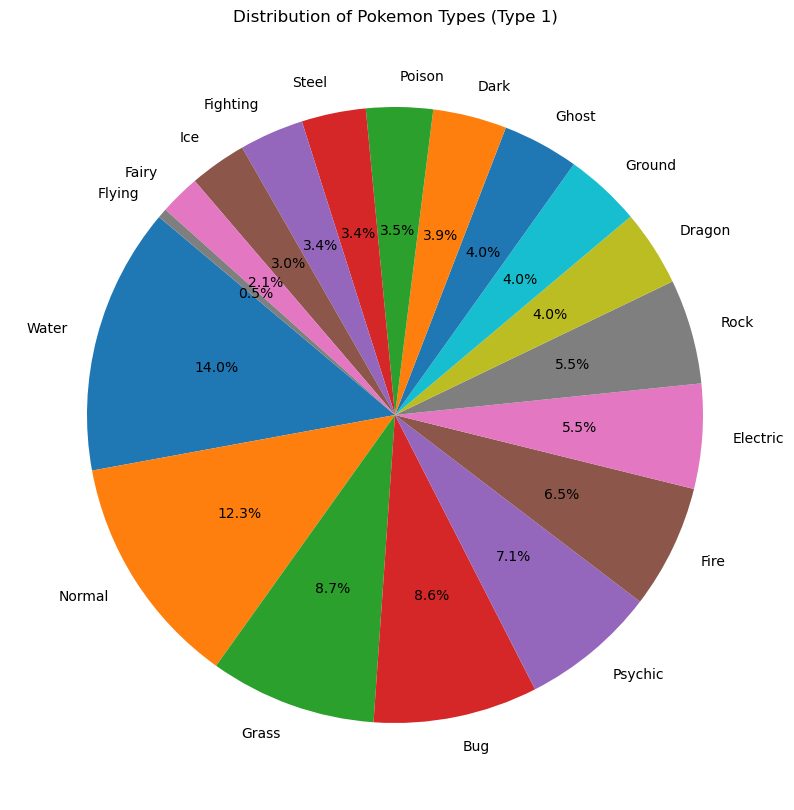

In [24]:
# Visualize the distribution of Pokemon types using pie chart
type1_counts = df['Type 1'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(type1_counts, labels=type1_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Pokemon Types (Type 1)")
plt.show()

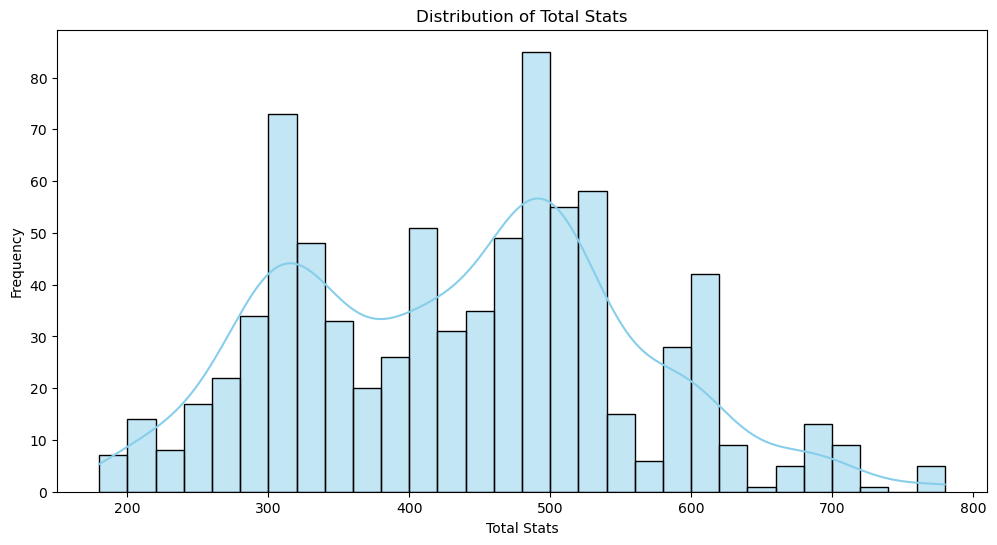

In [26]:
# Create a new column 'Total' as the sum of individual stats
df['Total'] = df['HP'] + df['Attack'] + df['Defense'] + \
                     df['Sp. Atk'] + df['Sp. Def'] + df['Speed']

# Analyze the distribution of Total stats
plt.figure(figsize=(12, 6))
sns.histplot(df['Total'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Total Stats")
plt.xlabel("Total Stats")
plt.ylabel("Frequency")
plt.show()

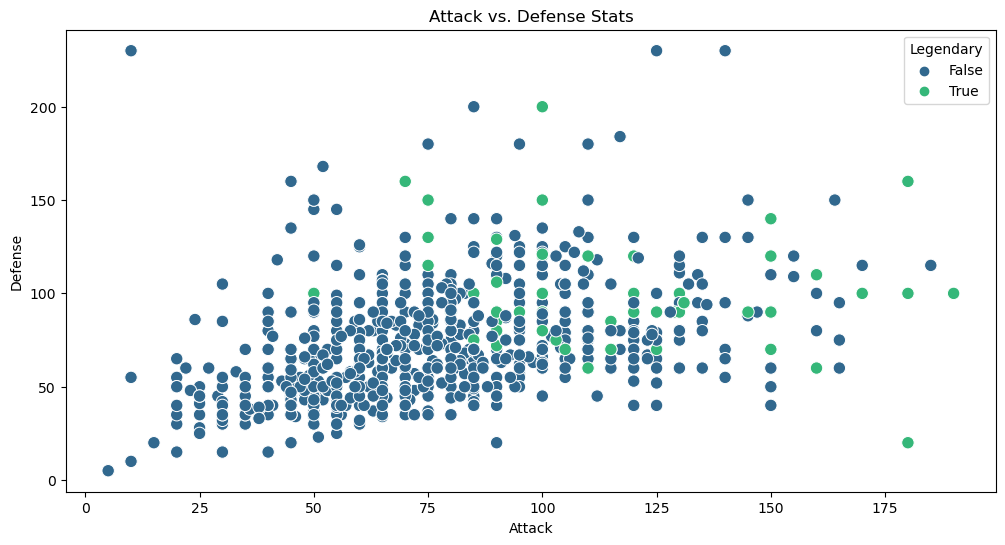

In [27]:
# Compare the attack and defense stats
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Attack', y='Defense', data=df, hue='Legendary', palette='viridis', s=80)
plt.title("Attack vs. Defense Stats")
plt.xlabel("Attack")
plt.ylabel("Defense")
plt.show()

## Dataset Splitting

In [29]:
features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']

In [30]:
X = df[features]
y = df['Legendary']

In [31]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Development

In [32]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [33]:
y_pred = clf.predict(X_test)

## Model Evaluation

In [34]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [35]:
# Display the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.95

Confusion Matrix:
 [[146   4]
 [  4   6]]

Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.97      0.97       150
        True       0.60      0.60      0.60        10

    accuracy                           0.95       160
   macro avg       0.79      0.79      0.79       160
weighted avg       0.95      0.95      0.95       160



## Visual Evaluation

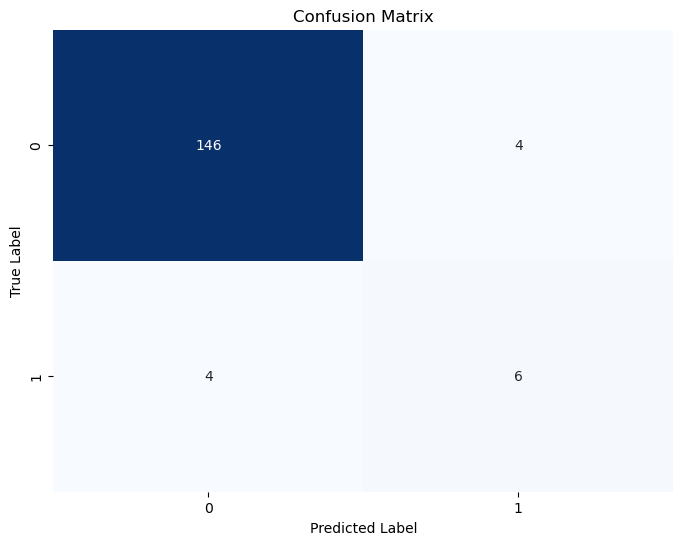

In [36]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

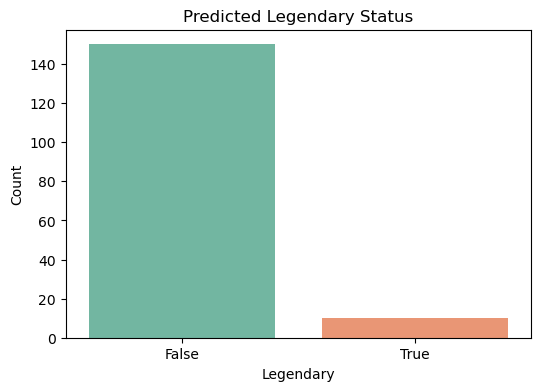

In [37]:
# Plotting the bar plot for predicted Legendary status
plt.figure(figsize=(6, 4))
sns.countplot(x=y_pred, palette='Set2')
plt.title('Predicted Legendary Status')
plt.xlabel('Legendary')
plt.ylabel('Count')
plt.show()